In [7]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.utils import to_categorical, plot_model

#Sequential


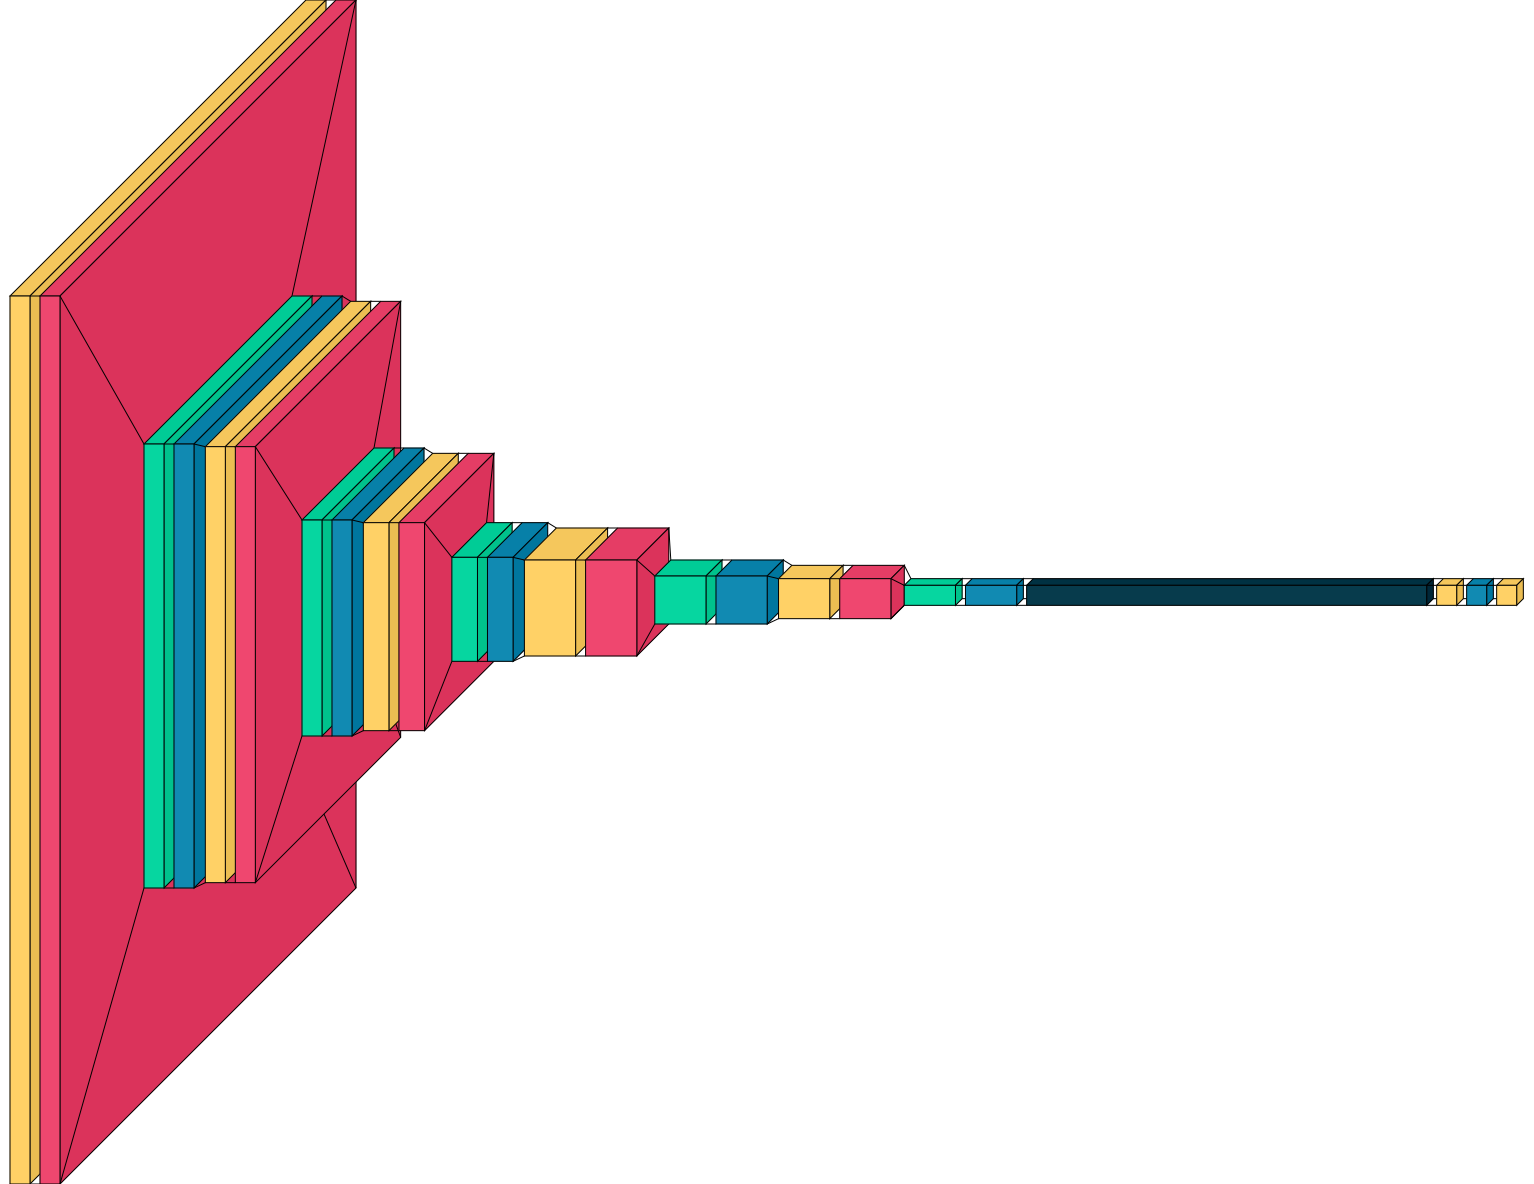

In [8]:
import visualkeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
# Tạo mô hình mẫu
def CNN_5Thing():
    model = keras.Sequential([
        keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(256, (3, 3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(512, (3, 3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(512, (3, 3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(0.2),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(5, activation='softmax')
    ])
    return model
model = CNN_5Thing()
# Trực quan hóa mô hình
visualkeras.layered_view(model, to_file='model.png')  # Lưu hình ảnh của mô hình vào một file

# Hiển thị hình ảnh trực tiếp trong notebook (cần có thư viện IPython)
from IPython.display import Image
Image(filename='model.png')

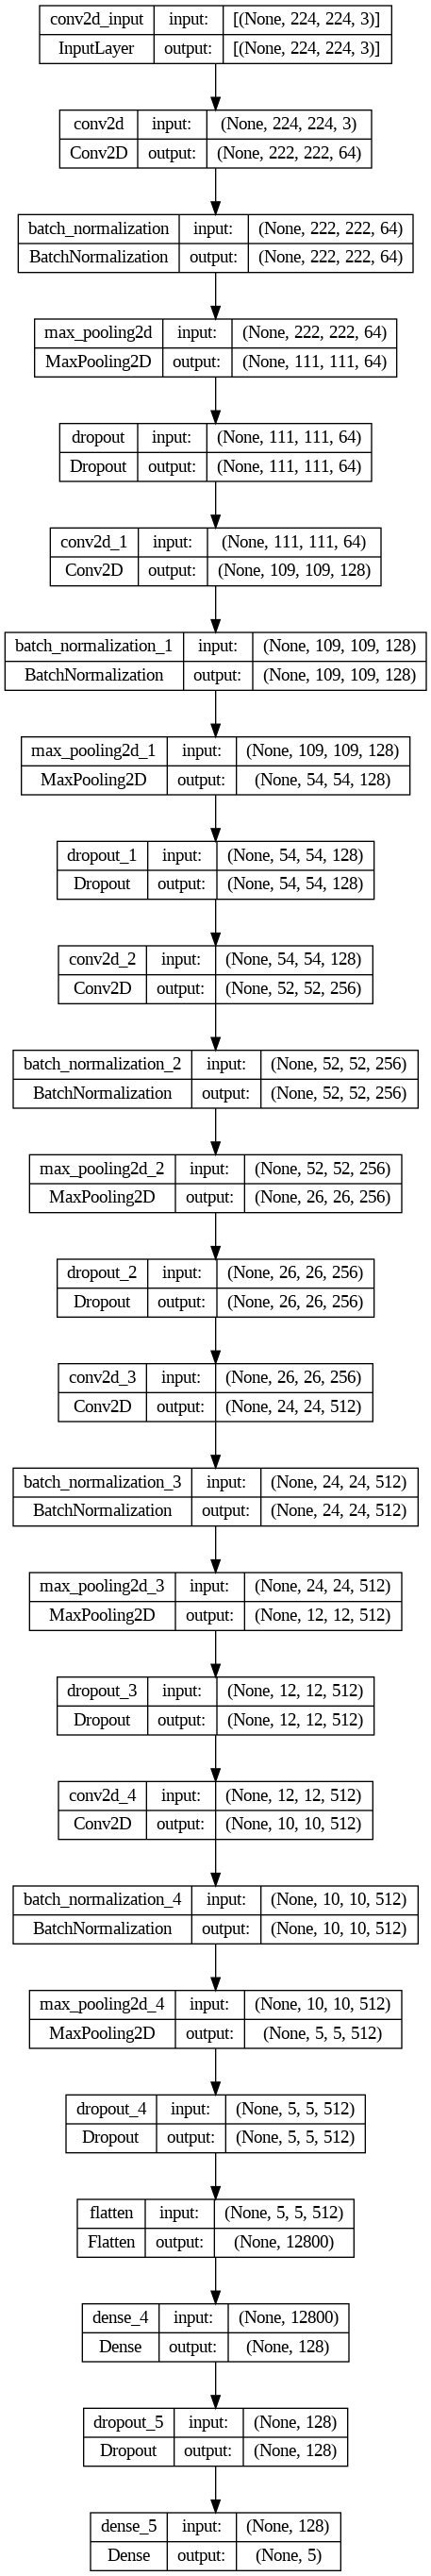

In [12]:
plot_model(model, to_file="Sequential.png", show_shapes=True)

#ResNet50

In [4]:
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

def ResNet_5Thing(input_shape=(224, 224, 3), num_classes=5):
    # Tạo mô hình ResNet50 với trọng số được đào tạo trước
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Đóng băng trọng số của mô hình ResNet50
    for layer in base_model.layers:
        layer.trainable = False

    # Tạo mô hình phân loại
    model = keras.Sequential([
        # Sử dụng mô hình ResNet50 làm phần trích xuất đặc trưng
        base_model,

        # Làm phẳng đầu ra của mô hình ResNet50
        GlobalAveragePooling2D(),

        # Tầng fully connected
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')  # Số lớp phân loại của bạn
    ])

    return model

# Create the optimized ResNet50 model
Resnet_Model = ResNet_5Thing()

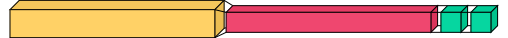

In [10]:
visualkeras.layered_view(Resnet_Model, to_file='Resnet_Model.png')  # Lưu hình ảnh của mô hình vào một file

# Hiển thị hình ảnh trực tiếp trong notebook (cần có thư viện IPython)
from IPython.display import Image
Image(filename='Resnet_Model.png')

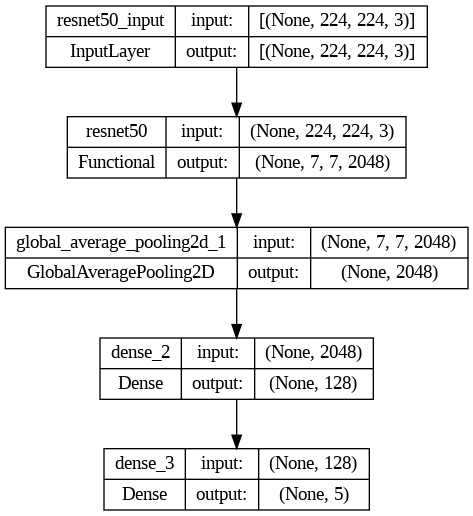

In [14]:
plot_model(Resnet_Model, to_file="Resnet50.png", show_shapes=True)